In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from matplotlib.colors import ListedColormap

In [278]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<Axes: xlabel='mean_area', ylabel='Count'>

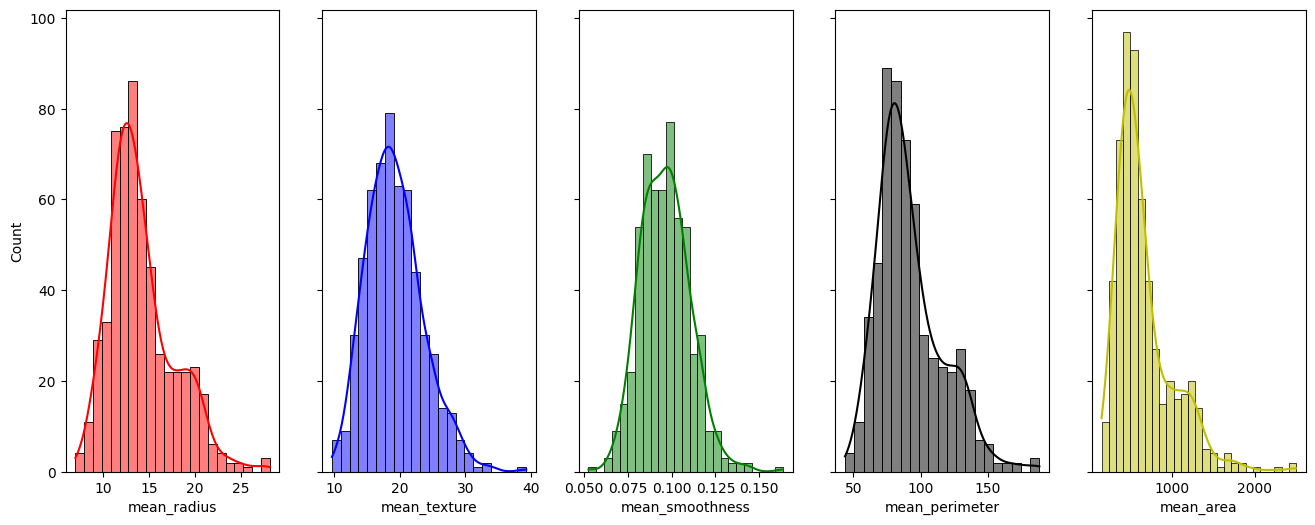

In [279]:
fig, axes = plt.subplots(1,5, figsize=(16, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_texture", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_smoothness", kde=True, color='g')
sns.histplot(data, ax=axes[3], x="mean_perimeter", kde=True, color='k')
sns.histplot(data, ax=axes[4], x="mean_area", kde=True, color='y')

<Axes: >

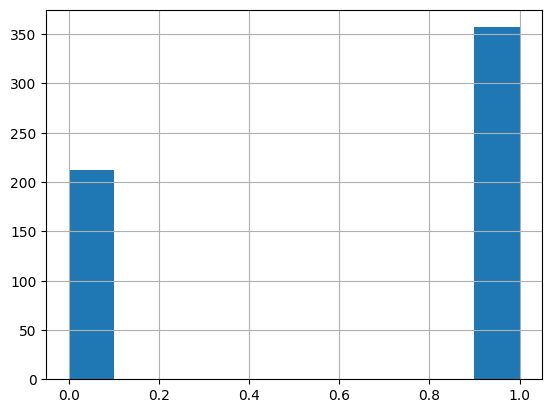

In [280]:
data['diagnosis'].hist()

In [281]:
#removing outliers by radius
data_radius= data.sort_values("mean_radius")
Q1_radius = data_radius.mean_radius.quantile(0.25)
Q3_radius = data_radius.mean_radius.quantile(0.75)
IQR_radius = Q3_radius - Q1_radius
lowerlimit_radius = Q1_radius - 1.5*IQR_radius
upperlimit_radius = Q3_radius + 1.5*IQR_radius
data_radius[(data_radius.mean_radius<lowerlimit_radius)|(data_radius.mean_radius>upperlimit_radius)]
NOout_radius = data_radius[(data_radius.mean_radius>lowerlimit_radius)&(data_radius.mean_radius<upperlimit_radius)]

In [282]:
#removing outliers by texture
data_texture= NOout_radius.sort_values("mean_texture")
Q1_texture= data_texture.mean_texture.quantile(0.25)
Q3_texture= data_texture.mean_texture.quantile(0.75)
IQR_texture= Q3_texture-Q1_texture
lowerlimit_texture = Q1_texture - 1.5*IQR_texture
upperlimit_texture = Q3_texture + 1.5*IQR_texture
data_texture[(data_texture.mean_texture<lowerlimit_texture)|(data_texture.mean_texture>upperlimit_texture)]
NOout_texture = data_texture[(data_texture.mean_texture>lowerlimit_radius)&(data_texture.mean_texture<upperlimit_radius)]

In [283]:
#removing outliers by smoothness
data_smoothness = NOout_texture.sort_values("mean_smoothness")
Q1_smoothness= data_smoothness.mean_smoothness.quantile(0.25)
Q3_smoothness= data_smoothness.mean_smoothness.quantile(0.75)
IQR_smoothness= Q3_smoothness-Q1_smoothness
lowerlimit_smoothness = Q1_smoothness - 1.5*IQR_smoothness
upperlimit_smoothness = Q3_smoothness + 1.5*IQR_smoothness
data_smoothness[(data_smoothness.mean_smoothness<lowerlimit_smoothness)|(data_smoothness.mean_smoothness>upperlimit_smoothness)]
NOout_smoothness = data_smoothness[(data_smoothness.mean_smoothness>lowerlimit_smoothness)&(data_smoothness.mean_smoothness<upperlimit_smoothness)]

In [284]:
#removing outliers by area
data_area = NOout_smoothness.sort_values("mean_area")
Q1_area= data_area.mean_area.quantile(0.25)
Q3_area= data_area.mean_area.quantile(0.75)
IQR_area= Q3_area-Q1_area
lowerlimit_area = Q1_area - 1.5*IQR_area
upperlimit_area = Q3_area + 1.5*IQR_area
data_area[(data_area.mean_area<lowerlimit_area)|(data_area.mean_area>upperlimit_area)]
NOout_area = data_area[(data_area.mean_area>lowerlimit_area)&(data_area.mean_area<upperlimit_area)]

In [285]:
#removing outliers by perimeter
data_perimeter = NOout_area.sort_values("mean_perimeter")
Q1_perimeter= data_perimeter.mean_perimeter.quantile(0.25)
Q3_perimeter= data_perimeter.mean_perimeter.quantile(0.75)
IQR_perimeter= Q3_perimeter-Q1_perimeter
lowerlimit_perimeter = Q1_perimeter - 1.5*IQR_perimeter
upperlimit_perimeter = Q3_perimeter + 1.5*IQR_perimeter
data_perimeter[(data_perimeter.mean_perimeter<lowerlimit_perimeter)|(data_perimeter.mean_perimeter>upperlimit_perimeter)]
NOout_perimeter = data_perimeter[(data_perimeter.mean_perimeter>lowerlimit_perimeter)&(data_perimeter.mean_perimeter<upperlimit_perimeter)]

In [286]:
#finally after rem0ving all outliners data from 569 rows is down to 516
finaldata = NOout_perimeter.sort_index()
finaldata

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
5,12.450,15.70,82.57,477.1,0.12780,0
6,18.250,19.98,119.60,1040.0,0.09463,0
7,13.710,20.83,90.20,577.9,0.11890,0
8,13.000,21.82,87.50,519.8,0.12730,0
...,...,...,...,...,...,...
546,10.320,16.35,65.31,324.9,0.09434,1
547,10.260,16.58,65.85,320.8,0.08877,1
548,9.683,19.34,61.05,285.7,0.08491,1
550,10.860,21.48,68.51,360.5,0.07431,1


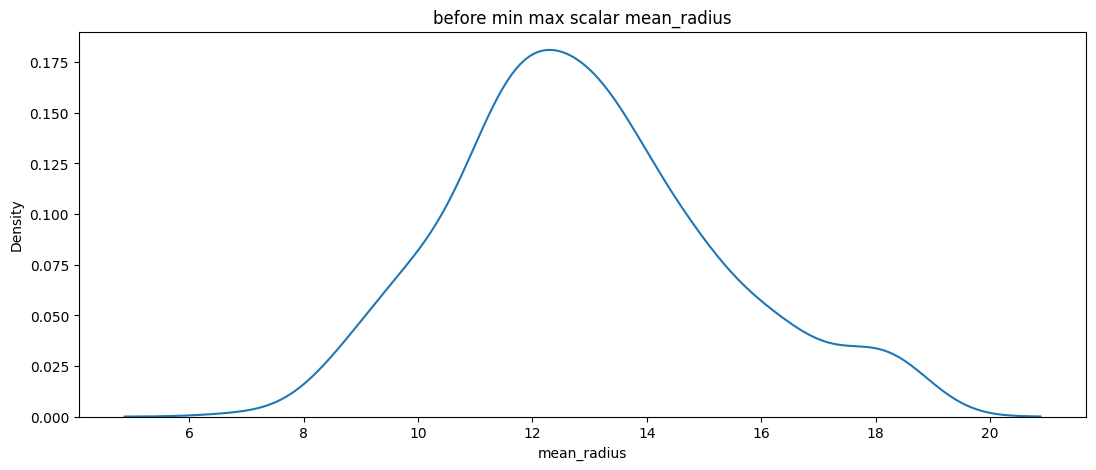

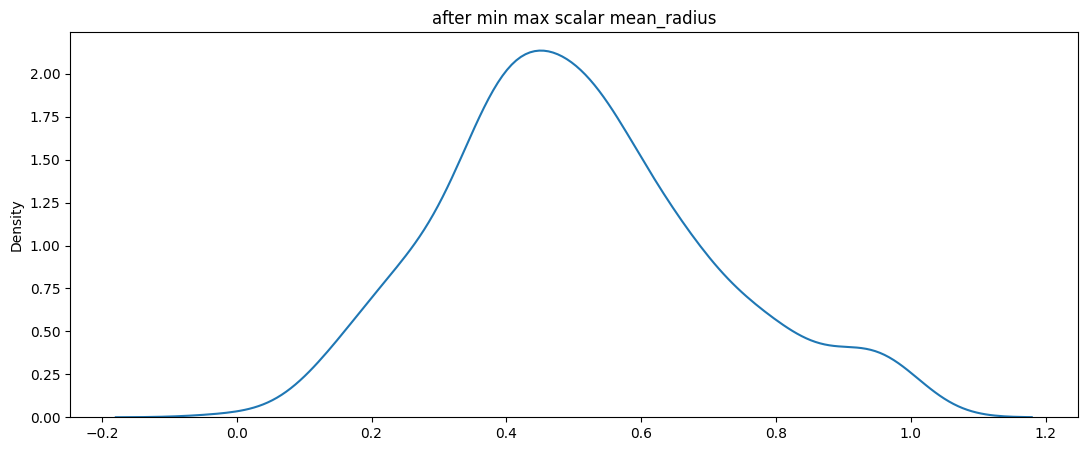

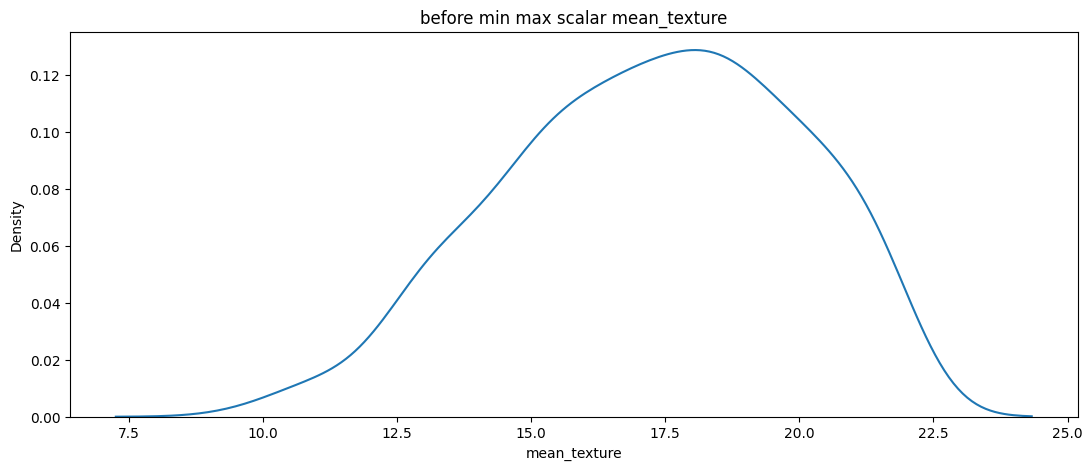

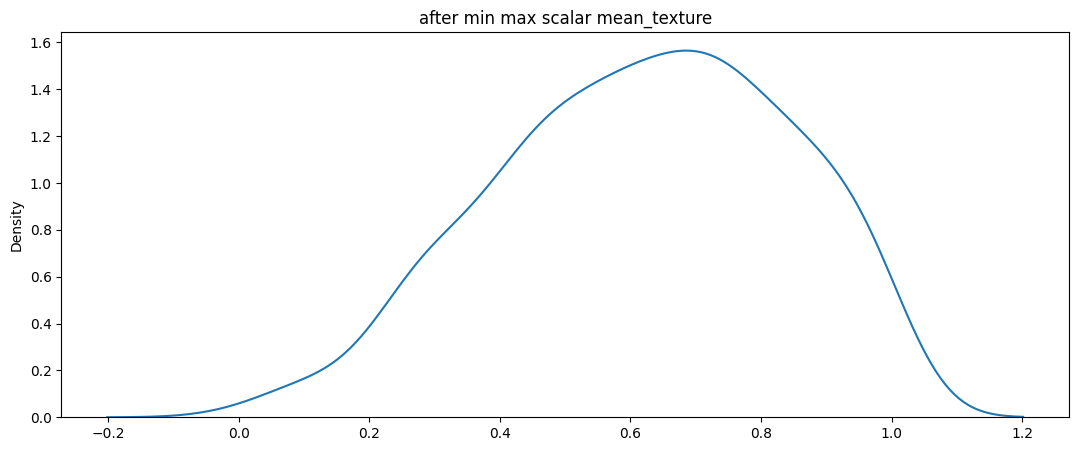

In [287]:
#minmax scalar on first 2 features 
def plots (df , var , t) :
    plt.figure(figsize=(13,5))
    sns.kdeplot(df[var])
    plt.title("before min max scalar "+var)
    plt.figure(figsize=(13,5))
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("after min max scalar "+var)
mms = MinMaxScaler()
i = 0
for columns in data.columns :
    i +=1
    plots(finaldata , columns , mms)
    if (i==2) :
        break

In [288]:
#binarizer on last 2 features
bin_area= Binarizer(threshold=1000)
column_area= finaldata['mean_area'].values
column_area = column_area.reshape(-1,1)
array_area = bin_area.fit_transform(column_area)
array_area = array_area.ravel()
#array_area
bin_smoothness= Binarizer(threshold=0.10)
column_smoothness= finaldata['mean_smoothness'].values
column_smoothness= column_smoothness.reshape(-1,1)
array_smoothness = bin_smoothness.fit_transform(column_smoothness)
array_smoothness = array_smoothness.ravel()
#array_smoothness

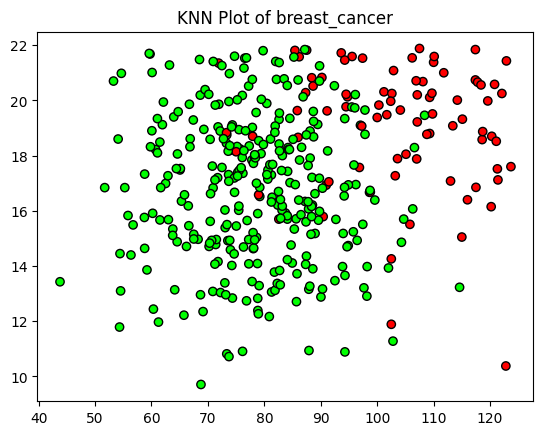

In [289]:
cmap = ListedColormap(['#FF0000','#00FF00'])
plt.figure()
plt.scatter(finaldata["mean_perimeter"],finaldata["mean_texture"], c=finaldata["diagnosis"], cmap=cmap, edgecolor='k')
plt.title("KNN Plot of breast_cancer")
plt.show()

In [290]:
for columns in data.columns :
    #i=+1
    #if i==4 : break
    data = data.sort_values(columns)
    Q1 , Q3 = data[columns].quantile(0.25) , data[columns].quantile(0.75)
    IQR = Q3 - Q1 
    lower , upper = Q1 - 1.5 * IQR ,  Q3 + 1.5 * IQR
    data = data[(data[columns]>lower)&(data[columns]<upper)]
data.sort_index()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
2,19.69,21.25,130.00,1203.0,0.10960,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,1
559,11.51,23.93,74.52,403.5,0.09261,1
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1


<Figure size 640x480 with 0 Axes>

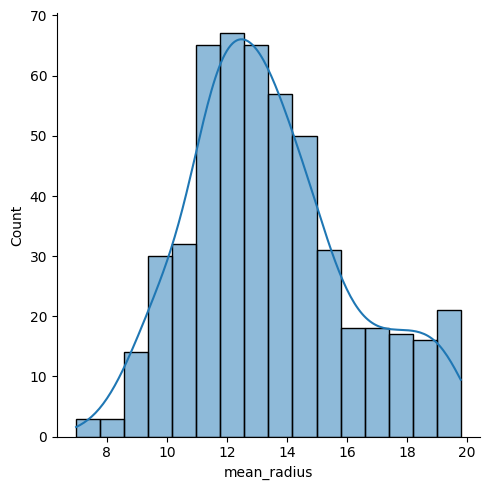

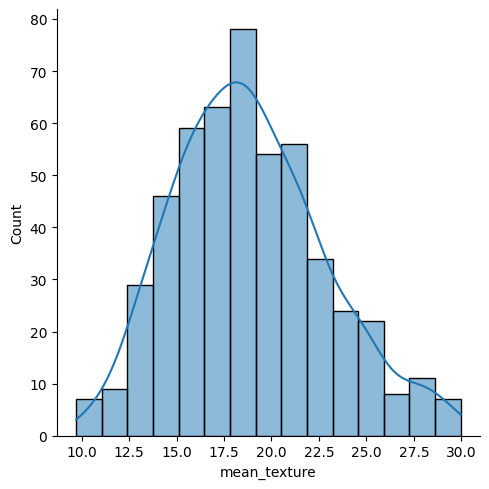

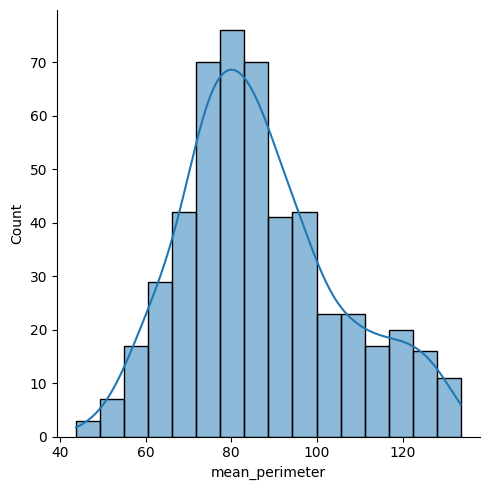

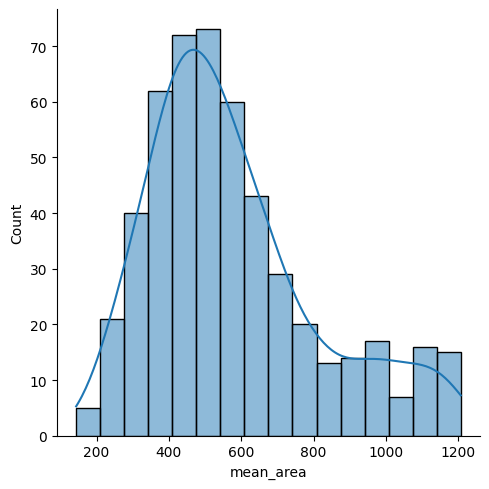

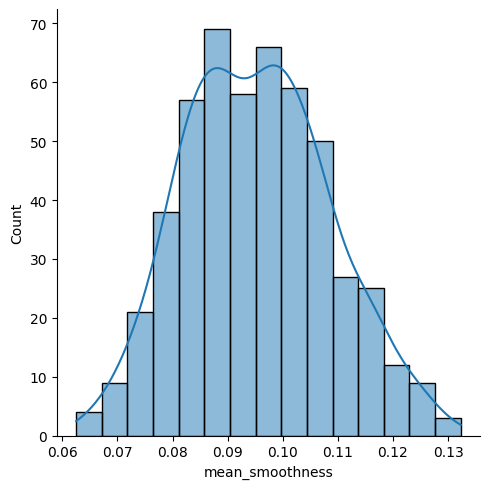

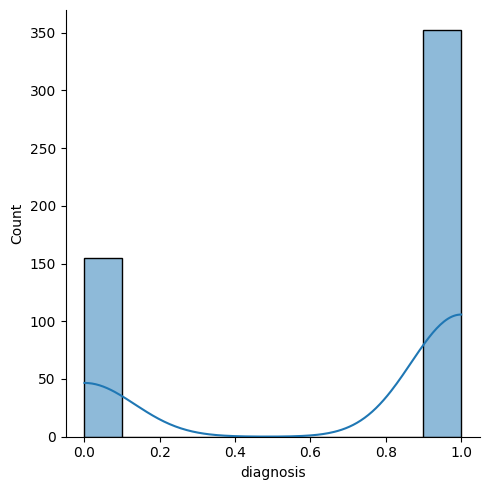

In [291]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.displot(data[col],kde=True)